In [108]:
import numpy as np 
# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[9.71343058e-01 7.17365705e-01 6.69595227e-01 ... 2.71451427e-01
  2.18624387e-02 6.11511372e-01]
 [2.81318277e-01 2.07761905e-01 1.93926723e-01 ... 7.86171757e-02
  6.33175225e-03 1.77104602e-01]
 [1.35616994e-02 1.00157179e-02 9.34875595e-03 ... 3.78995107e-03
  3.05239039e-04 8.53780067e-03]
 ...
 [6.60735655e-01 4.87972910e-01 4.55478049e-01 ... 1.84649116e-01
  1.48714634e-02 4.15967730e-01]
 [6.50176556e-01 4.80174702e-01 4.48199136e-01 ... 1.81698271e-01
  1.46338052e-02 4.09320224e-01]
 [3.78976820e-01 2.79885640e-01 2.61247628e-01 ... 1.05908822e-01
  8.52979536e-03 2.38585774e-01]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.88345822  0.64969404  0.80042548 ...  0.39264125  0.07570972
   0.66748083]
 [ 0.37007748  0.05217146  0.11198487 ... -0.00175118  0.07663235
   0.06487272]
 [ 0.01550415  0.06018323 -0.04443596 ...  0.07870368 -0.07490096
   0.08777618]
 ...
 [ 0.61914108  0.28105372  0.53021654 ...  0.10151915 -0.07412876
   0.51353709

In [109]:
print(u)

[0.99969878 0.2895306  0.0139576  0.25088867 0.03105409 0.36720156
 0.07156737 0.80664668 0.43776768 0.50640914 0.6149168  0.83354049
 0.4552263  0.86215434 0.24621185 0.43885916 0.65381255 0.6242675
 0.53718886 0.52037347 0.1362611  0.85405256 0.35860859 0.86020973
 0.81745386 0.64811543 0.6094276  0.884622   0.47863013 0.89472247
 0.83321851 0.69497063 0.16747871 0.87335582 0.74884574 0.50703066
 0.01205483 0.7124611  0.1953945  0.5860786  0.78564144 0.68122631
 0.82073129 0.76748847 0.82850909 0.75728564 0.54003449 0.68002404
 0.6691567  0.39004002]


In [110]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [111]:
mycebmf0= cEBMF(data    = noisy_matrix,  K=10)
mycebmf0.init_LF( )

In [112]:
mycebmf= cEBMF(data    = noisy_matrix,
               prior_L = "exp",
               prior_F = "exp",K=10)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

U, s, Vt = np.linalg.svd(mycebmf.data, full_matrices=False)
mycebmf.init_LF( )
U
mycebmf.L
 

array([[-3.36527848e+00, -6.44590706e-02,  1.49249919e-02,
        -2.02037580e-02, -1.82749510e-01, -1.29834116e-01,
        -2.06564456e-01, -7.49268830e-02, -1.01922989e-01,
        -2.16173559e-01],
       [-8.09336543e-01,  1.40805051e-01,  5.87261170e-02,
        -8.51620063e-02,  5.85920364e-02,  9.80579574e-03,
         2.26011187e-01, -4.02423769e-01,  1.34799734e-01,
         1.23742837e-02],
       [-5.92898093e-02, -1.94657966e-01,  1.54332444e-01,
         2.08679494e-02,  3.48742455e-02, -6.21703975e-02,
         6.98933005e-02, -7.92995244e-02,  1.78047374e-01,
         2.60031875e-02],
       [-7.57391810e-01,  1.17689833e-01,  5.26618212e-02,
         8.25415924e-02, -1.18817888e-01,  1.31734788e-01,
        -1.78765357e-01,  6.36137724e-02, -1.30466223e-01,
        -3.23161297e-02],
       [-9.09175128e-02, -7.70317391e-02,  8.40236396e-02,
        -2.42832512e-01,  1.19046308e-01, -6.51090294e-02,
        -1.21380221e-02,  3.08570445e-01, -1.29303858e-01,
        -2.

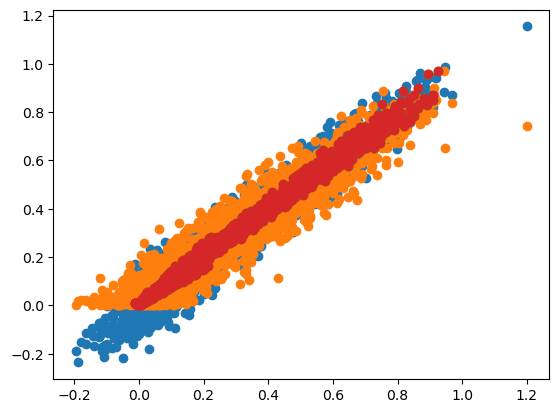

In [113]:
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix) 

plt.scatter(np.outer(mycebmf0.L[:,0],mycebmf0.F[:,0] ), rank_1_matrix) 

In [114]:
mycebmf.F

array([[-0.27468106,  0.004303  , -0.05664828, -0.04540357,  0.16282949,
        -0.22618525,  0.04225927, -0.20393343,  0.03817857, -0.07190139],
       [-0.20014295,  0.01362791,  0.3304907 ,  0.04611865,  0.14555088,
         0.13481115, -0.3304888 ,  0.12868294,  0.31558326, -0.02563313],
       [-0.18319559, -0.21364543,  0.00401952,  0.06740647, -0.1824106 ,
        -0.06776784, -0.02796227,  0.10196036, -0.23707649, -0.27437836],
       [-0.03286956,  0.26638046, -0.1784216 , -0.04498697, -0.23717879,
         0.03765533, -0.19107354,  0.02550568, -0.21548988, -0.03399199],
       [-0.25645068, -0.14099275,  0.17113775,  0.00432558, -0.21633929,
        -0.08099738,  0.14082311, -0.14185807, -0.02521411, -0.01420433],
       [-0.16956614,  0.09614798,  0.13332058, -0.0895064 ,  0.24367474,
         0.10429516,  0.02666418, -0.268174  , -0.29502347, -0.04792018],
       [-0.12255216, -0.12487981, -0.00718008,  0.06117206,  0.36134377,
         0.25321028,  0.01420766, -0.02644509

In [115]:
#3mycebmf.update_loading_factor_k(k=0)


In [116]:
#mycebmf0.update_loading_factor_k(k=0)


In [117]:
mycebmf0.L

array([[-3.36528015e+00, -6.44591749e-02, -1.49251940e-02,
        -2.02032700e-02, -1.82747796e-01, -1.29836261e-01,
        -2.06564069e-01, -7.49280527e-02,  1.01922572e-01,
        -2.16173187e-01],
       [-8.09335828e-01,  1.40805185e-01, -5.87276444e-02,
        -8.51614028e-02,  5.85913286e-02,  9.80730448e-03,
         2.26015404e-01, -4.02422667e-01, -1.34795845e-01,
         1.23743229e-02],
       [-5.92906848e-02, -1.94657832e-01, -1.54332608e-01,
         2.08684728e-02,  3.48748602e-02, -6.21698163e-02,
         6.98949322e-02, -7.92998895e-02, -1.78046852e-01,
         2.60026827e-02],
       [-7.57391274e-01,  1.17689930e-01, -5.26609756e-02,
         8.25433955e-02, -1.18819311e-01,  1.31732553e-01,
        -1.78766340e-01,  6.36132509e-02,  1.30465120e-01,
        -3.23160104e-02],
       [-9.09176543e-02, -7.70317540e-02, -8.40254351e-02,
        -2.42832869e-01,  1.19046375e-01, -6.51066452e-02,
        -1.21415602e-02,  3.08570802e-01,  1.29301697e-01,
        -2.

In [118]:
k=1
mycebmf.cal_partial_residuals(k=k)

        # Compute estimates for L
lhat, s_l = compute_hat_f_and_s_f(mycebmf.Rk, mycebmf.L[:, k], mycebmf.L2[:, k], mycebmf.tau, mycebmf.has_nan)
res=ash(lhat, s_l, prior="exp")
res.log_lik

72.2447569804902

In [119]:
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")

from distribution_operation import *
from utils import *
from numerical_routine import *
from posterior_computation import *
from ash import *

In [120]:
betahat , sebetahat= lhat, s_l

In [121]:
scale = autoselect_scales_mix_exp(betahat=betahat, sebetahat=sebetahat )
L = get_data_loglik_exp(betahat=betahat, sebetahat=sebetahat,   scale=scale)
exp_L = np.exp(L)
optimal_pi = optimize_pi(exp_L, penalty=10, verbose=False)
out = posterior_mean_exp(
        betahat,
        sebetahat,
        log_pi=np.log(optimal_pi + 1e-32),
        scale=scale)

In [122]:
out.post_mean

array([7.81569447e-04, 8.55165752e-04, 1.62610403e-04, 2.37315873e-02,
       2.49972652e-04, 2.12411788e-03, 2.77915167e-04, 1.81721664e-03,
       2.16025783e-02, 2.11081456e-03, 4.42109973e-04, 3.52128942e-04,
       5.46209854e-04, 1.37115160e-02, 2.13609930e-03, 1.92121246e-03,
       7.23455983e-04, 3.58309521e-03, 3.96168806e-02, 8.03232757e-05,
       1.64925874e-04, 3.80192899e-04, 2.45856134e-04, 2.25483664e-04,
       3.54371833e-03, 2.42445123e-04, 6.81129010e-04, 1.65879933e-04,
       9.03613138e-04, 1.37949341e-03, 6.73308806e-04, 2.27038796e-04,
       5.92280443e-04, 6.97970412e-04, 1.34009471e-03, 7.40279029e-02,
       3.05050391e-03, 3.19437462e-04, 8.01879958e-04, 2.24877828e-04])

In [123]:
res_1=mycebmf.prior_L(mycebmf.X_l, lhat, s_l, mycebmf.model_list_L[k])

In [124]:
mycebmf.prior_L

<function cEBMF.prior_exp(X, betahat, sebetahat, model_param)>

In [125]:
res_1.post_mean


array([7.23498215e-04, 7.92876059e-04, 1.47164286e-04, 2.37667768e-02,
       2.27417493e-04, 2.00430717e-03, 2.53193733e-04, 1.70920230e-03,
       2.15820440e-02, 1.99149265e-03, 4.05474830e-04, 3.21863745e-04,
       5.02608250e-04, 1.35335236e-02, 2.01585004e-03, 1.80907581e-03,
       6.68811911e-04, 3.41982222e-03, 4.01381900e-02, 7.21810687e-05,
       1.49283845e-04, 3.47902661e-04, 2.23624128e-04, 2.04866931e-04,
       3.38138946e-03, 2.20481696e-04, 6.29037960e-04, 1.50157313e-04,
       8.38616410e-04, 1.29040697e-03, 6.21694909e-04, 2.06297800e-04,
       5.45716350e-04, 6.44857623e-04, 1.25285006e-03, 7.52489395e-02,
       2.90098523e-03, 2.91578963e-04, 7.42631320e-04, 2.04309549e-04])

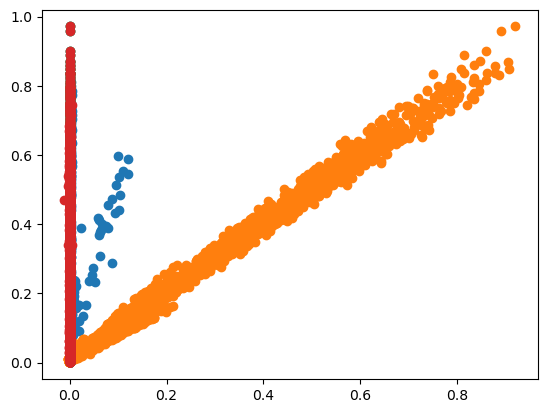

In [126]:

mycebmf .iter()
mycebmf0.iter() 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(mycebmf0.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)
plt.scatter(np.outer(mycebmf0.L[:,1],mycebmf0.F[:,1] ), rank_1_matrix)

In [127]:
for i in range(40):
    mycebmf.iter()
    mycebmf0.iter() 


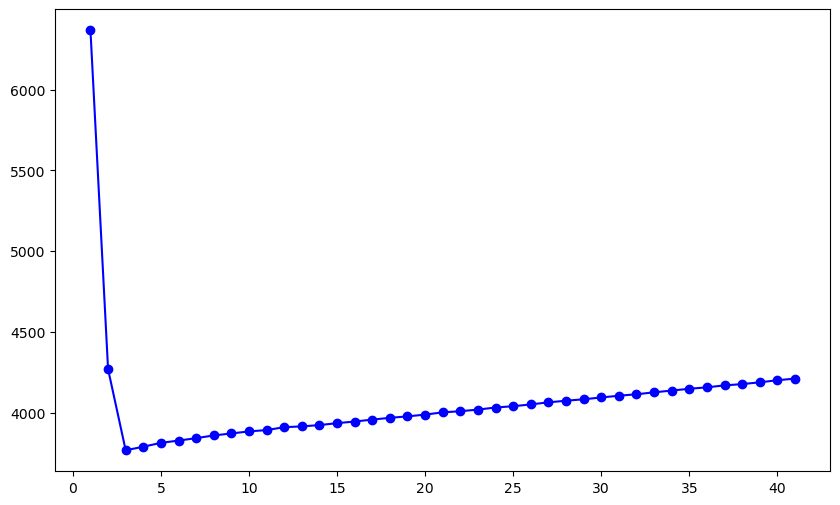

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj) , marker='o', linestyle='-', color='b')

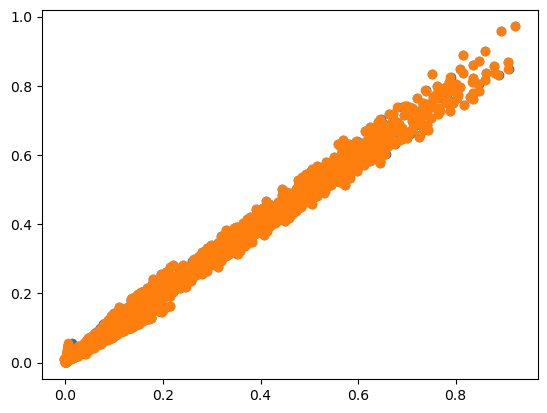

In [129]:
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
 
plt.scatter(mycebmf0.Y_fit, rank_1_matrix)


In [130]:
np.sqrt(np.mean((np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ) - rank_1_matrix) ** 2))

0.3571292008703557

In [131]:
np.sqrt(np.mean((np.outer(mycebmf0.L[:,0],mycebmf0.F[:,0] ) - rank_1_matrix) ** 2))

0.021198463345034658

In [132]:
mycebmf.prior_L

<function cEBMF.prior_exp(X, betahat, sebetahat, model_param)>

In [133]:
mycebmf.L

array([[4.4889407e-06, 2.0098021e-05, 5.0994613e-06, 5.0199128e-06,
        5.7365532e-06, 1.0161866e-01, 5.0270487e-06, 5.2235882e-06,
        4.9500986e-06, 4.9348105e-06],
       [4.4885192e-06, 2.0096137e-05, 5.0989825e-06, 5.0194412e-06,
        5.7360144e-06, 2.4319163e-02, 5.0265762e-06, 5.2230976e-06,
        4.9496339e-06, 4.9343471e-06],
       [4.4895583e-06, 2.0100779e-05, 5.1001630e-06, 5.0206036e-06,
        5.7373422e-06, 8.9135696e-04, 5.0277399e-06, 5.2243067e-06,
        4.9507798e-06, 4.9354894e-06],
       [4.4886160e-06, 2.0096570e-05, 5.0990925e-06, 5.0195499e-06,
        5.7361385e-06, 2.2760451e-02, 5.0266849e-06, 5.2232103e-06,
        4.9497407e-06, 4.9344535e-06],
       [4.4884905e-06, 2.0096009e-05, 5.0989497e-06, 5.0194094e-06,
        5.7359780e-06, 1.3387052e-03, 5.0265444e-06, 5.2230644e-06,
        4.9496020e-06, 4.9343153e-06],
       [4.4887556e-06, 2.0097194e-05, 5.0992512e-06, 5.0197059e-06,
        5.7363168e-06, 3.9369985e-02, 5.0268413e-06, 5.22

In [134]:
k=0
mycebmf.cal_partial_residuals(k=k)

        # Compute estimates for L
lhat, s_l = compute_hat_l_and_s_l(mycebmf.Rk, mycebmf.F[:, k], mycebmf.F2[:, k], mycebmf.tau, mycebmf.has_nan)

In [135]:
normal_means_loglik(x=lhat , 
                                            s=  s_l,
                                            Et=ash_obj.post_mean,
                                            Et2= ash_obj.post_mean2
                                           )

NameError: name 'ash_obj' is not defined

In [ ]:
ash_obj.log_lik


481.358716088944

In [ ]:
-0.5 * np.sum(np.log(2 * np.pi * s**2) + (1 / s**2) * (Et2 - 2 * x * Et + x**2))

ValueError: operands could not be broadcast together with shapes (40,) (50,) 

[0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063 0.00253063
 0.00253063 0.00253063]


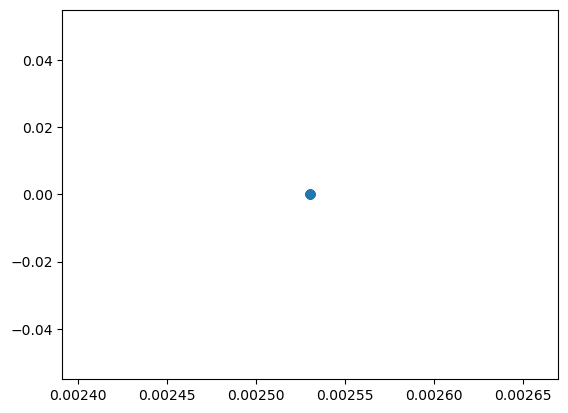

In [ ]:
optimal_pi
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat= betahat ,
                        sebetahat=sebetahat ,
                                 log_pi=log_pi , 
                                 scale=scale)
plt.scatter(out.post_mean, lhat)
print(out.post_mean)


In [ ]:
print(  np.sum(np.exp(L)*optimal_pi, axis=1) )

[6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05
 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05 6.5913036e-05]


In [ ]:
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
print( np.exp(L)*optimal_pi )

[[6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]
 [6.59127765e-05 2.11791704e-10 4.24984447e-11 5.00118907e-12
  2.36863436e-13 2.73360663e-15 4.49813996e-18 7.17432045e-22]


In [ ]:
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)

print(L)

threshold_loglikelihood =  -300  # Example of a very small threshold
L = np.maximum(L,  (threshold_loglikelihood))
print(L)
log_lik =    np.sum(np.log(np.sum(np.exp(L)*optimal_pi, axis=1)))

[[-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.95146753]
 [-9.62717427 -9.63693546 -9.64626062 -9.66379588 -9.69533353 -9.74859295
  -9.8318191  -9.

In [ ]:
np.exp(L[1,]) 

array([6.59130391e-05, 6.52727797e-05, 6.46669294e-05, 6.35428623e-05,
       6.15701408e-05, 5.83767451e-05, 5.37149551e-05, 4.76576437e-05])

In [ ]:
i=6
print(scale)
print(betahat[i]/sebetahat[i])
convolved_logpdf_exp(betahat=betahat[i],
                                         sebetahat=sebetahat[i],  
                                         scale=scale)

[   0.          605.25527344  855.96021639 1210.51054687 1711.92043279
 2421.02109375 3423.84086557 4842.0421875 ]
0.0


array([-9.62717427, -9.63693546, -9.64626062, -9.66379588, -9.69533353,
       -9.74859295, -9.8318191 , -9.95146753])